<a href="https://colab.research.google.com/github/zum-m/01_jouhougakugairon/blob/DL/Copy_of_sin_RNN_kadai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, Bidirectional
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

正弦波(ノイズ入り）を生成する関数群

In [21]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def noisy_sin(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = noisy_sin()

データセットを生成する関数

In [22]:
def make_dataset(noisysin):

    data, target = [], []
    maxlen = 25

    for i in range(len(noisysin)-maxlen):
        data.append(noisysin[i:i + maxlen])
        target.append(noisysin[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

#g：学習データ，h：正解ラベル
g, h = make_dataset(f)

モデルの設定

In [23]:
maxlen = 25
len_sequence = maxlen
n_out = 1
n_hidden = 300

print("入力データ型 ",(None, len_sequence, n_out))
model = Sequential()
model.add(SimpleRNN(n_hidden,batch_input_shape=(None,len_sequence , n_out),return_sequences= False))
model.add(Dense(n_out))
model.add(Activation('linear'))
model.summary()




model.summary()


入力データ型  (None, 25, 1)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 300)               90600     
                                                                 
 dense_7 (Dense)             (None, 1)                 301       
                                                                 
 activation_7 (Activation)   (None, 1)                 0         
                                                                 
Total params: 90901 (355.08 KB)
Trainable params: 90901 (355.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 300)               90600     
                                      

モデルの学習

In [24]:
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr = 0.001))
model.fit(g,h,batch_size = 300, epochs = 100)



Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.8302
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 1.1930
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 0.1870
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2077
Epoch 5/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0903
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0794
Epoch 7/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0273
Epoch 8/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0243
Epoch 9/100
1/1 [==============================] - 0s 61ms/step - loss: 0.0445
Epoch 10/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0313
Epoch 11/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0567
Epoch 12/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0386
Epoch 13/100
1/1 [==============================] -

モデルを使って予測する(1点先の予測）

6/6 [==============================] - 0s 9ms/step


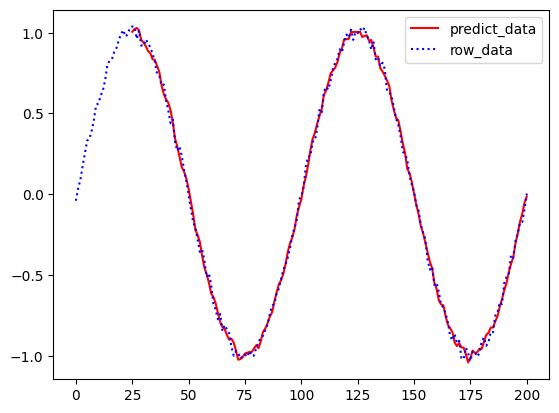

In [25]:
predicted = model.predict(g)

plt.figure()
plt.plot(range(maxlen,len(predicted)+maxlen),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", linestyle="dotted",label="row_data")
plt.legend()
plt.show()

モデルを使って予測する(長期予測）

(1, 25, 1)
201
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


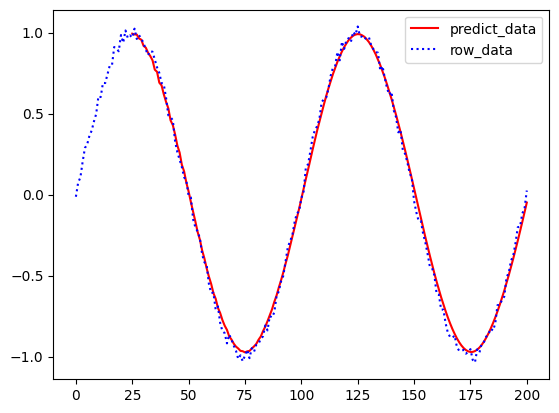

In [26]:
f = noisy_sin()
maxlen=25
data = f[:maxlen]
predicted = []

input = f[:maxlen]
#配列の次元をモデルの入力次元に合わせる
input = input[np.newaxis,:,np.newaxis]
print(input.shape)

# 予測データの先頭に None をmaxlen個入れておく
predicted = [None for i in range(maxlen)]

print(len(f))
for i in range(len(f) - maxlen):
    output = model.predict(input) # 予測した値 output は (1,1) 配列
    # input を (maxlen,1) 配列に変換し、先頭1個をスライスして削り、末尾に output を足す。
    # 再度 (1,maxlen,1) 配列に変換して、全体を次の input にする
    input = np.concatenate( (input.reshape(maxlen, 1)[1:], output), axis=0 ).reshape(1, maxlen, 1)

    # output は (1,1) 配列なので一次元配列に変換してからpredictedに追加
    predicted.append(output.reshape(1))

plt.figure()
plt.plot(range(0,len(f)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", linestyle="dotted", label="row_data")
plt.legend()
plt.show()

双方RNNにモデルを変更して実行する。

In [37]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def noisy_sin(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = noisy_sin()

In [38]:
def make_dataset(noisysin):

    data, target = [], []
    maxlen = 25

    for i in range(len(noisysin)-maxlen):
        data.append(noisysin[i:i + maxlen])
        target.append(noisysin[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

#g：学習データ，h：正解ラベル
g, h = make_dataset(f)

In [39]:
maxlen = 25
len_sequence = maxlen
n_out = 1
n_hidden = 300


print('入力データ型', (None, len_sequence, n_out))

model = Sequential()
model.add(Bidirectional(SimpleRNN(n_hidden,batch_input_shape = (None, len_sequence, n_out),return_sequences = False)))
model.add(Dense(n_out))
model.add(Activation('linear'))



入力データ型 (None, 25, 1)


In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr = 0.001))
model.fit(g,h,batch_size = 300, epochs = 100)



(1, 25, 1)
201
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


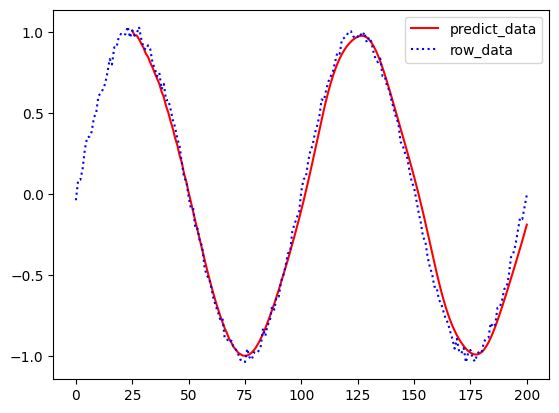

In [42]:
f = noisy_sin()
maxlen=25
data = f[:maxlen]
predicted = []

input = f[:maxlen]
#配列の次元をモデルの入力次元に合わせる
input = input[np.newaxis,:,np.newaxis]
print(input.shape)

# 予測データの先頭に None をmaxlen個入れておく
predicted = [None for i in range(maxlen)]

print(len(f))
for i in range(len(f) - maxlen):
    output = model.predict(input) # 予測した値 output は (1,1) 配列
    # input を (maxlen,1) 配列に変換し、先頭1個をスライスして削り、末尾に output を足す。
    # 再度 (1,maxlen,1) 配列に変換して、全体を次の input にする
    input = np.concatenate( (input.reshape(maxlen, 1)[1:], output), axis=0 ).reshape(1, maxlen, 1)

    # output は (1,1) 配列なので一次元配列に変換してからpredictedに追加
    predicted.append(output.reshape(1))

plt.figure()
plt.plot(range(0,len(f)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", linestyle="dotted", label="row_data")
plt.legend()
plt.show()